# Classification Model
* <b>File Name</b>                          : Reference_implementation
* <b>Date of creation(dd-mm-yyyy)</b>       : 31-01-2023
* <b>Author Name/Dept</b>                   : AIShield
* <b>Organization</b>                       : BGSW
* <b>Description</b>                        : Source Code of reference implementation
* <b>Copyright</b>                          : Copyright 2022 Bosch Global Software Technologies Private Limited. All Rights Reserved.

### Metadata
* Dataset: mnist
* Size of training set: 54,000
* Size of testing set : 10,000
* Size of training set: 6,000
* Number of class : 10
* Original Model: CNN

### Outcomes
* Accuracy of model: 0.99

# 1.0 Install and Import Libraries

In [1]:
"""
Description: commands to install all the packages, remove comments to install all the libraries
"""
# !pip install numpy==1.22
# !pip install pandas==1.1.5
# !pip install matplotlib==3.5.1
# !pip install tensorflow==2.9.1
# !pip install scikit-learn==1.0.2
# !pip install requests==2.28.0
# !pip install zipp==3.7.0
# !pip install opencv-python

'\nDescription: commands to install all the packages, remove comments to install all the libraries\n'

In [2]:
"""
Description: Import libraries
"""
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, optimizers , Sequential
from sklearn.model_selection import train_test_split
import zipfile 
import pandas as pd
import cv2
import os
import random
import requests
import json
import time
import shutil

# 2.0 Data Loading and Preprocessing

In [3]:
'''
Description : Loading mnist dataset
'''
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

In [4]:
'''
Description : Splitting data for validation
'''
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,stratify = y_train,test_size = 0.1,random_state = 42)

In [5]:
'''
Description : Check size of dataset
'''
print("shape of x_train: ",X_train.shape)
print("shape of y_train: {}".format(y_train.shape))
print(f'shape of x_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')
print(f'shape of x_val: {X_val.shape}')
print(f'shape of y_val: {y_val.shape}')

shape of x_train:  (54000, 28, 28)
shape of y_train: (54000,)
shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)
shape of x_val: (6000, 28, 28)
shape of y_val: (6000,)


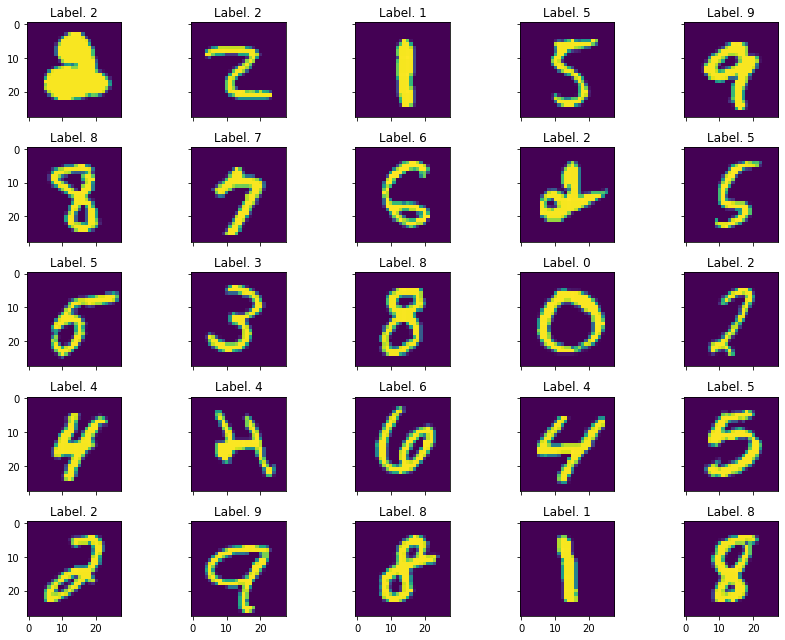

In [6]:
'''
Description: Visualize few random data sample
'''
rows=5

random_indices=random.sample(range(X_train.shape[0]),rows*rows)
sample_images=X_train[random_indices,:]
sample_labels=y_train[random_indices]

fig,axs=plt.subplots(nrows=rows,ncols=rows,figsize=(12,9),sharex=True,sharey=True)
for i in range(rows*rows):
    subplot_row=i // rows
    subplot_col=i % rows
    axs[subplot_row,subplot_col].imshow(sample_images[i,:])
    axs[subplot_row,subplot_col].set_title("Label. %d" % sample_labels[i])
plt.tight_layout()

In [7]:
'''
Description : Set num_classes and input shape 
'''
img_row,img_col,channel=28,28,1
num_classes=10
input_shape=(img_row,img_col,channel)

In [8]:
"""
Description: Normalizing and reshaping the data
"""
X_train = X_train.reshape(-1,*input_shape)/255.0
X_val =  X_val.reshape(-1,*input_shape)/255.0
X_test =  X_test.reshape(-1,*input_shape)/255.0

In [9]:
"""
Description : Convert label to one hot encoder
"""
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

# 3.0 Model Development and Training

In [10]:
def make_directory(directory):
    """
    create directory

    Parameters
    ----------
    directorys : list containing the directorys path to create 
    Returns
    -------
    None.

    """
    for d in directory:
        if os.path.isdir(d):
            print("directory {} already exist".format(d))
        if os.path.isdir(d)==False:
            os.mkdir(path=d)
            print("directory {} created successfully".format(d))

In [11]:
def delete_directory(directorys):
    """
    delete directory 

    Parameters
    ----------
    directorys : list containing the directorys to deleate along with all the files

    Returns
    -------
    None.

    """
    if len(directorys)>=1:
        for d in directorys:
            if os.path.isdir(d):
                try:
                    if os.path.isfile(d):
                        os.remove(path=d)
                    else:
                        shutil.rmtree(path=d)
                        print("Removed: {}".format(d))
                except:
                    print("Failed to removed: {}".format(d))
            else:
                print("Failed to removed: {}".format(d))
                

In [12]:
def make_archive(base_name,root_dir,zip_format='zip'):
    """
    created zip for given folder

    Parameters
    ----------
    base_name : name of zip file
    root_dir : directory to archive/zip
    zip_format : zip or tar 
        DESCRIPTION. The default is 'zip'.

    Returns
    -------
    None.

    """
    shutil.make_archive(base_name=base_name, format=zip_format, root_dir=root_dir)
    

In [13]:
pwd

'C:\\Users\\tnq1kor\\Downloads'

In [66]:
"Description : Create data, model and label folder"
data_path=os.path.join(os.getcwd(),"data")
model_path=os.path.join(os.getcwd(),"model")
label_path=os.path.join(os.getcwd(),"label")
zip_path=os.path.join(os.getcwd(),"zip")
pyc_model_path=os.path.join(os.getcwd(),"pyc_model")
report_path = os.path.join(os.getcwd(), "reports")
sample_data = os.path.join(report_path, "sample_data")
defense_artifact = os.path.join(report_path, "defense_artifact")


#deleting folder
delete_directory(directorys=[data_path,model_path,label_path,zip_path,pyc_model_path,report_path])

#creating folder
make_directory([data_path,model_path,label_path,zip_path,pyc_model_path,report_path, sample_data,
                defense_artifact])

In [15]:
"""
Description: Create model architecture
"""
model = Sequential([
    layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  
])
#Compile model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-3), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
"""
Description: Model summary
"""
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [17]:
"""
Description: Model architecture plot
"""
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [18]:
"""
Description : Callbacks
"""
# Checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_path,'mnist_model.h5'),monitor='val_loss',verbose=1,save_best_only=True,mode='auto')
# Early stopper
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=5,mode='min')

callbacks = [early_stop, checkpoint]

In [19]:
"""
Description: Training model
"""
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 3, batch_size=64, verbose = 1 , callbacks = callbacks)

Epoch 1/3
844/844 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.9273
Epoch 1: val_loss improved from inf to 0.04024, saving model to C:\Users\tnq1kor\Downloads\model\mnist_model.h5
844/844 [==============================] - 43s 31ms/step - loss: 0.2368 - accuracy: 0.9273 - val_loss: 0.0402 - val_accuracy: 0.9865
Epoch 2/3
844/844 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9760
Epoch 2: val_loss improved from 0.04024 to 0.02393, saving model to C:\Users\tnq1kor\Downloads\model\mnist_model.h5
844/844 [==============================] - 25s 30ms/step - loss: 0.0838 - accuracy: 0.9760 - val_loss: 0.0239 - val_accuracy: 0.9918
Epoch 3/3
843/844 [============================>.] - ETA: 0s - loss: 0.0609 - accuracy: 0.9824
Epoch 3: val_loss improved from 0.02393 to 0.02166, saving model to C:\Users\tnq1kor\Downloads\model\mnist_model.h5
844/844 [==============================] - 27s 32ms/step - loss: 0.0609 - accuracy: 0.9824 - val_loss: 0.

In [20]:
"""
Description: Evaluate trained model
"""
loss,accuracy=model.evaluate(X_test, y_test)
print("* Loss: {} \n* Accuracy: {}".format(loss,accuracy))

313/313 [==============================] - 5s 16ms/step - loss: 0.0217 - accuracy: 0.9924
* Loss: 0.021663090214133263 
* Accuracy: 0.9923999905586243


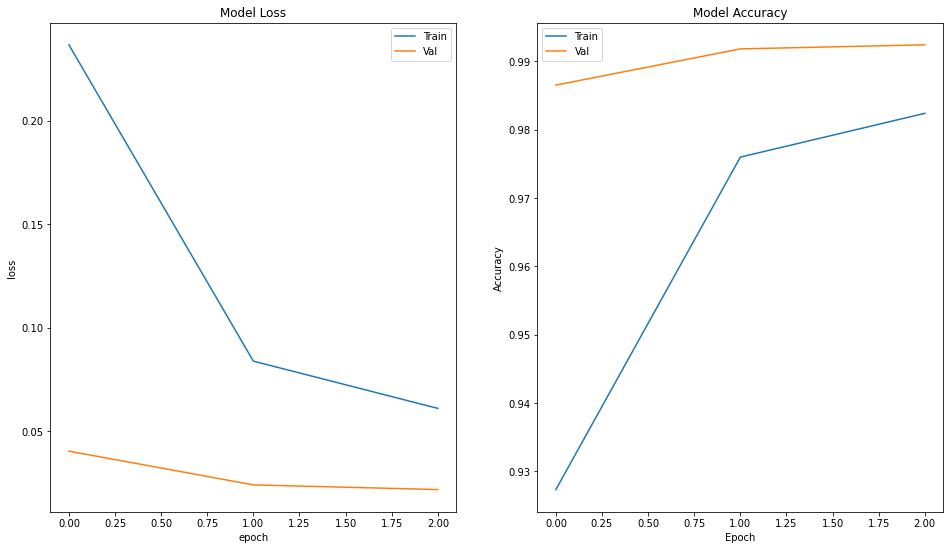

In [21]:
"""
Description: Visualize model learning 
"""
fig, ax = plt.subplots(1, 2, figsize = (16, 9))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].legend(['Train', 'Val'], loc = 'best')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc = 'best')

plt.show()

# 4.0 Prepare Data , Model and Label

In [22]:
"""
Description: Save data and label
"""
label=pd.DataFrame()
img_name = []
img_label = [] 
  
for i in range(X_val.shape[0]):
    cv2.imwrite(os.path.join(data_path,str(i)+".jpg") ,X_val[i]*255.0) # don't use plt.imread otheriwse while loading the saved images , and passing to model there is accuarcy drop 
    img_name.append(str(i)+".jpg")
    img_label.append(y_val[i])
label['image'] = img_name
label["label"] = np.array(img_label)

#write orig_label dataframe
label.to_csv(os.path.join(label_path,"label.csv"),index=False)

In [23]:
"""
Description: Zip data
"""
make_archive(base_name=os.path.join(zip_path,"data"),root_dir=data_path,zip_format='zip')

In [24]:
"""
Description: Zip label
"""
make_archive(base_name=os.path.join(zip_path,"label"),root_dir=label_path,zip_format='zip')

# 4.1 Convert python script (.py) to (.pyc)

In [32]:
"""
Description: save weight of model
"""
model.save_weights(os.path.join(pyc_model_path,"model_weight.h5"))

In [33]:
python_code='''
#import library
import numpy as np
import tensorflow as tf

#define class
class BaseModel():
    """
    class for base model
    """
    def __init__(self,input_shape=(28,28,1),num_classes=10,model_weight_path="model_weight.h5"):
        """
        constructor for class

        Parameters
        ----------
        input_shape : TYPE, optional
            DESCRIPTION. The default is (28,28,1).
        num_classes : TYPE, optional
            DESCRIPTION. The default is 10.
        model_weight_path : string, optional
            DESCRIPTION. the relative path to model weight

        Returns
        -------
        None.

        """
        self.input_shape=input_shape
        self.num_classes=num_classes
        self.model_weight_path=model_weight_path
        

    def cnn_model(self,input_shape,num_classes):
        """
        model architecture

        Parameters
        ----------
        input_shape : string
            DESCRIPTION.input_shape for model e.g (28,28,1)
        num_classes : string
            DESCRIPTION.number of class e.g 10

        Returns
        -------
        model : model
            DESCRIPTION.

        """
        #create sequential model

        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(strides=(2,2)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, activation='softmax')   # used softmax , so set from_logits = False in cross entropy loss
        ])

        
        return model
    
    def predict(self,X):
        """
        predict for given data

        Parameters
        ----------
        X : numpy array 
            DESCRIPTION.

        Returns
        -------
        pred : numpy array
            DESCRIPTION.

        """
        model=self.cnn_model(input_shape=self.input_shape,num_classes=self.num_classes)
        model.load_weights(self.model_weight_path)
        
        pred=np.argmax(model.predict(X),axis=-1)
        return pred '''

In [34]:
# Writing to file
with open("base_model.py", "w") as file:
    # Writing data to a file
    file.writelines(python_code)

In [90]:
"""
Description: function to create .pyc file
"""
import py_compile
py_compile.compile(file='base_model.py',cfile=os.path.join(pyc_model_path,'base_model.pyc'))

'\nDescription: function to create .pyc file\n'

* .pyc file with name base_model.pyc will get created
* delete .py file and still import and other function will work
* while AIShield API call , inplace of model.h5 file you can zip .pyc and model weight which will provide security to internal architecture

In [36]:
"""
Description: check import from .pyc file
"""
from pyc_model.base_model import BaseModel
base_model=BaseModel(model_weight_path=r"pyc_model/model_weight.h5")

1/1 [==============================] - 0s 211ms/step
[1]


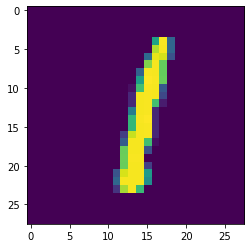

In [37]:
"""
Description : getting prediction from function imported from .pyc file
"""
print(base_model.predict(X_val[:1]))
plt.imshow(np.squeeze(X_val[0]))

In [40]:
"""
Description: Zip model
"""
model_encryption=0 #0 if model is uploaded directly as a zip, 1 if model is encryted as .pyc and uploaded as a zip
if model_encryption:
    make_archive(base_name=os.path.join(zip_path,"model"),root_dir=pyc_model_path,zip_format='zip')
else:
    make_archive(base_name=os.path.join(zip_path,"model"),root_dir=model_path,zip_format='zip')

# 5.0 AIShield API Call

In [41]:
"""
Description: AIShield API URL and subscription key
""" 
url="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"  # fill in API endpoint url from AIShield developer portal under API tab 
headers={'Cache-Control': 'no-cache',
'x-api-key': "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX", # fill in subscription key from AIShield developer portal under My Dashboard tab
'Org-Id' : "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"  # fill in Org_Id provided in welcome email
}

### 5.1 Model Registration

In [43]:
"""
Description: call Model registration api to get unique model it and url to upload data, model and label
"""
model_registration_url = url + "/model_registration/upload"
model_registration_payload = {
    'task_type':"IC",
    "analysis_type": "MEA"
}
new_request = requests.request(method="POST", url=model_registration_url, headers=headers, json=model_registration_payload)
new_request = json.loads(new_request.text)
model_id = new_request['data']['model_id']
data_upload_url = new_request['data']['urls']['data_upload_url']
label_upload_url = new_request['data']['urls']['label_upload_url']
model_upload_url = new_request['data']['urls']['model_upload_url']
print('model_id: ', model_id)

model_id:  f175a49a-f767-428e-b55c-d1828d03c668


In [44]:
"""
Description: Files path
"""
data_path=os.path.join(zip_path,'data.zip') #full path of data zip
label_path=os.path.join(zip_path,'label.zip') #full path of label zip
model_path=os.path.join(zip_path,'model.zip') #full path of model zip

In [45]:
def upload_file(url, file_path):
    new_request = requests.request(method="PUT", url=url, data=open(file_path,'rb'))
    status_cd = new_request.status_code
    if status_cd == 200:
        status = 'upload sucessful'
    else:
        status = 'upload failed'
    return status

In [46]:
"""
Description: Hit AIShield File Upload API
"""

data_upload_status = upload_file(data_upload_url, data_path)
label_upload_status = upload_file(label_upload_url, label_path)
model_upload_status = upload_file(model_upload_url, model_path)
print('data_upload_status: ', data_upload_status)
print('label_upload_status: ', label_upload_status)
print('model_upload_status: ', model_upload_status)

data_upload_status:  upload sucessful
label_upload_status:  upload sucessful
model_upload_status:  upload sucessful


### 5.2 Model Analysis

In [49]:
"""
Description: Payload for AIShield VulnerabilityReport api call
"""
payload={}
payload['model_id']=model_id
payload['use_model_api']="no"
payload['model_api_details']="no"
payload['normalize_data']="Yes"
payload['input_dimensions']=str(input_shape)
payload['number_of_classes']=str(num_classes)
payload['attack_type']="blackbox"  
payload['number_of_attack_queries']=60000
payload['model_framework']='tensorflow'
payload['vulnerability_threshold']="0"
payload['defense_bestonly']="no"
payload['encryption_strategy']= model_encryption

In [88]:
"""
Description: Hit AIShield VulnerabilityReport api
"""
model_analysis_url = url + "/model_analyse/{}".format(model_id)
if data_upload_status == "upload sucessful" and model_upload_status == "upload sucessful" and label_upload_status == "upload sucessful":
    new_request = requests.request(method="POST", url=model_analysis_url, json=payload,headers=headers)
    new_request=json.loads(new_request.text)
    for k, v in new_request.items():
        print("* {} : {}".format(k,v))

* api_version : 1.5
* job_id : XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
* monitor_link : XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [89]:
"""
Description: Get job id from api response
"""
job_id=new_request['job_id']
print(f"Job id : {job_id}")

Job id : XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [52]:
def monitor_api_progress(new_job_id):
        job_status_url = url + "/job_status_detailed?job_id=" + new_job_id

        # status dictionary
        status_dictionary = {
            'ModelExploration_Status': 'na',
            'SanityCheck_Status': 'na',
            'QueryGenerator_Status': 'na',
            'VunerabilityEngine_Status': 'na',
            'DefenseReport_Status': 'na',
        }
        counts = [0] * len(status_dictionary)
        failed_api_hit_count = 0
        while True:
            time.sleep(2)
            try:
                job_status_response = requests.request("GET", job_status_url, params={},
                                                       headers=headers)

                job_status_payload = json.loads(job_status_response.text)
                failing_key = 'ModelExploration_Status'
                for i, key in enumerate(status_dictionary.keys()):
                    if status_dictionary[key] == 'na':
                        if job_status_payload[key] == 'inprogress' and status_dictionary[key] == 'na':
                            status_dictionary[key] = job_status_payload[key]
                            print(str(key), ":", status_dictionary[key])

                        elif job_status_payload[key] == 'completed' or job_status_payload[key] == 'passed':
                            status_dictionary[key] = job_status_payload[key]
                            counts[i] += 1
                            print(str(key), ":", status_dictionary[key])

                        if job_status_payload[key] == 'failed':
                            failing_key = key
                            status_dictionary[key] = job_status_payload[key]
                            print(str(key), ":", status_dictionary[key])

                    elif job_status_payload[key] == 'completed' or job_status_payload[key] == 'passed':
                        status_dictionary[key] = job_status_payload[key]
                        if counts[i] < 1:
                            print(str(key), ":", status_dictionary[key])
                        counts[i] += 1

                    else:
                        if job_status_payload[key] == 'failed':
                            failing_key = key
                            status_dictionary[key] = job_status_payload[key]
                            print(str(key), ":", status_dictionary[key])

                if job_status_payload[failing_key] == 'failed':
                    break

                if status_dictionary['VunerabilityEngine_Status'] == 'passed' or status_dictionary[
                    'VunerabilityEngine_Status'] == 'completed' and job_status_payload[
                    'CurrentStatus'] == "Defense generation is not triggered":
                    print("\n Vulnerability score {} failed to cross vulnerability threshold of {}".format(
                        job_status_payload['VulnerabiltyScore'], payload['vulnerability_threshold']))
                    break
                if job_status_payload['DefenseReport_Status'] == 'completed':
                    break
            except Exception as e:
                failed_api_hit_count += 1
                print("Error {}. trying {} ...".format(str(e), failed_api_hit_count))
                if failed_api_hit_count >= 3:
                    break
        return status_dictionary

In [53]:
"""
Description: Continuos monitoring of job progress
"""
status_dictionary = monitor_api_progress(new_job_id=job_id)

ModelExploration_Status : inprogress
ModelExploration_Status : completed
SanityCheck_Status : passed
QueryGenerator_Status : inprogress
QueryGenerator_Status : completed
VunerabilityEngine_Status : inprogress
VunerabilityEngine_Status : completed
DefenseReport_Status : inprogress
DefenseReport_Status : completed


In [54]:
def download_artifact(job_id, report_type='Vulnerability', file_format=0):
    """
    job_id: job_id  received after successful api call
    report_type: report to be downloaded
    file_format: change file_format to : 0- all report in zip 
                        1- report in .txt 
                        2- report in .pdf
                        3- report in .json
                        4- report in .xml
    """
    report_url = url + "/" + "get_report?job_id=" + str(
        job_id) + "&report_type=" + report_type + "&file_format=" + str(file_format)

    headers1=headers
    headers1["content-type"]= "application/zip"

    response = requests.request("GET", report_url, params={}, headers=headers1)

    if file_format == 0 or "Attack_samples":
        with open(os.path.join(report_path, report_type + ".zip"), 'wb') as f:
            f.write(response.content)
    elif file_format == 1:
        with open(os.path.join(report_path, report_type + ".txt"), 'wb') as f:
            f.write(response.content)
    elif file_format == 2:
        with open(os.path.join(report_path, report_type + ".pdf"), 'wb') as f:
            f.write(response.content)
    elif file_format == 3:
        with open(os.path.join(report_path, report_type + ".json"), 'wb') as f:
            f.write(response.content)
    elif file_format == 4:
        with open(os.path.join(report_path, report_type + ".xml"), 'wb') as f:
            f.write(response.content)

In [69]:
"""
Description: download generated artifact
"""
if status_dictionary["VunerabilityEngine_Status"] == 'completed':
    download_artifact(job_id=job_id, report_type='Vulnerability', file_format=0) 
    download_artifact(job_id=job_id, report_type='Attack_samples', file_format=0)

if status_dictionary["DefenseReport_Status"] == 'completed':
    download_artifact(job_id=job_id, report_type='Defense', file_format=0)
    download_artifact(job_id=job_id, report_type='Defense_artifact', file_format=0)

In [56]:
def zip_extractor(file, extract_path=None, delete_zip=False):
    """
    extract zip file to the given path

    Parameters
    ----------
    file : path of zip file
    extract_path : path to extract zip file, default considered parent directory
    delete_zip: True, delete zip file after unzipping it

    Returns
    -------
    None.
    """
    if extract_path is None:
        extract_path = os.path.dirname(file)
    print("Extracting : {}".format(file))
    zf = zipfile.ZipFile(file=file, mode='r')
    zf.extractall(extract_path)
    zf.close()
    if delete_zip:
        os.remove(file)
        print("{} removed successfully.".format(file))


In [85]:
"""
Description: Extracting defense artifact
"""
zip_extractor(file=os.path.join(report_path, 'Defense_artifact.zip'))

'\nDescription: Extracting defense artifact\n'

In [71]:
"""
Description: Load defense model
"""
defense_model_path = os.path.join(report_path, 'defense_model.h5')
defense_model = tf.keras.models.load_model(defense_model_path)

In [72]:
"""
Description: Use defense model
"""
from reports import predict
defense = predict.AISDefenseModel(defense_model)

In [73]:
"""
Description: Pass original data to get prediction
"""
label , prob = defense.predict(X_val[:5])
print("label: {} \nprob: {}".format(label, prob))

1/1 [==============================] - 0s 146ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

label: ['not-attack' 'not-attack' 'not-attack' 'not-attack' 'not-attack'] 
prob: [0.99982905 0.99999857 0.99680483 0.9999652  0.99999285]


In [86]:
"""
Description: extract attack sample
"""
zip_extractor(file=os.path.join(report_path, 'Attack_samples.zip'), extract_path=sample_data)

'\nDescription: extract attack sample\n'

In [82]:
def get_file_path(path):
    """
    To get full file path from directory and child directory
    Args:
        path: Directory path

    Returns: list containing full path of all the file from the given directory

    """
    list_id = []
    for (root, dirs, files) in os.walk(path, topdown=True):
        if len(dirs) == 0:
            for file in files:
                list_id.append(os.path.join(root, file))
    return list_id


def load_data(path):
    """
    path: load data from given path
    """
    files_path = get_file_path(path)
    x = []
    for file in files_path:
        img = cv2.imread(file, 0)
        x.append(img)
    x = np.expand_dims(np.array(x), axis=-1)
    return x/255.0

In [83]:
"""
Description: load attack data
"""
x_attack = load_data(path=sample_data)

In [84]:
"""
Description: Pass sample attack data to get prediction
"""
label , prob = defense.predict(x_attack[:5])
print("label: {} \nprob: {}".format(label, prob))

1/1 [==============================] - 0s 43ms/step


100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

label: ['attack' 'attack' 'attack' 'attack' 'attack'] 
prob: [0.99999094 0.99913675 0.99993443 0.99993753 0.9999933 ]
